In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [2]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

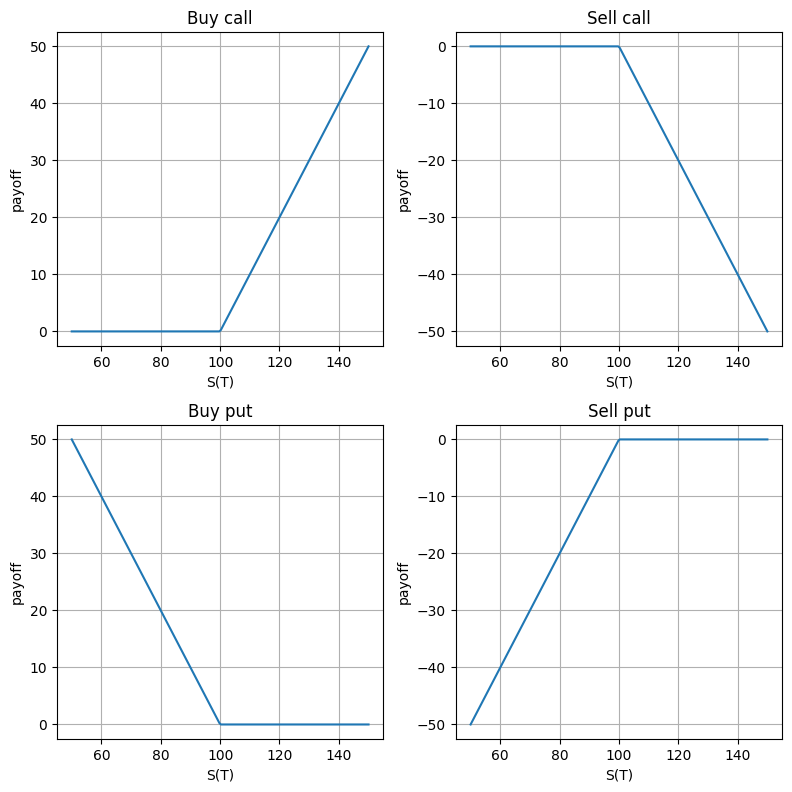

In [3]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [4]:
# Цена базового актива
S = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

min: -4.40000000000002
max: 5.599999999999994


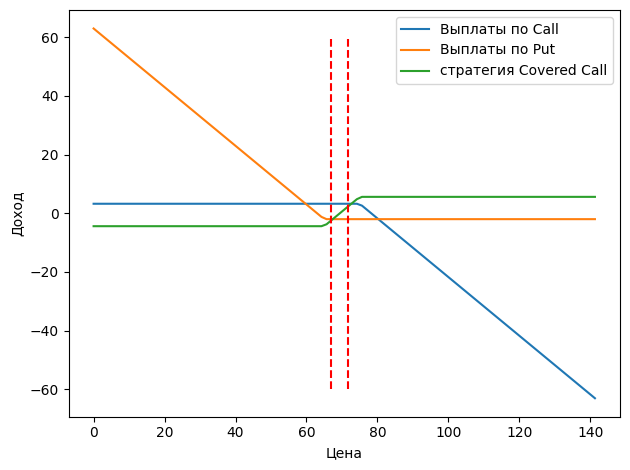

In [5]:
prices = np.linspace(0, S*2, 100)

payoff_short_call = np.where(K_short_call - prices > 0, 0, K_short_call - prices) + premium_short_call
payoff_long_put = np.where(prices - K_long_put > 0, 0, K_long_put - prices) - premium_long_put

payoff_convered_call = payoff_short_call + payoff_long_put + prices - S
# если сработал пут - пут дал выплату, мы продали актив и сравняли прибыль и убыток
# если сработал кол - выплатили по колу, но дорого продали свой актив, потому сравняли
print(f'min: {min(payoff_convered_call)}')
print(f'max: {max(payoff_convered_call)}')

plt.plot(prices, payoff_short_call, label='Выплаты по Call')
plt.plot(prices, payoff_long_put, label='Выплаты по Put')
plt.plot(prices, payoff_convered_call, label='стратегия Covered Call')
plt.plot(np.ones(30) * (K_short_call - premium_short_call), np.linspace(-60, 60, 30), '--', color='red')
plt.plot(np.ones(30) * (K_long_put + premium_long_put), np.linspace(-60, 60, 30), '--', color='red')
plt.xlabel('Цена')
plt.ylabel('Доход')
plt.legend()
plt.tight_layout()
plt.show()

## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [6]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

MAX: 170.71
MIN: -28.661859296482426


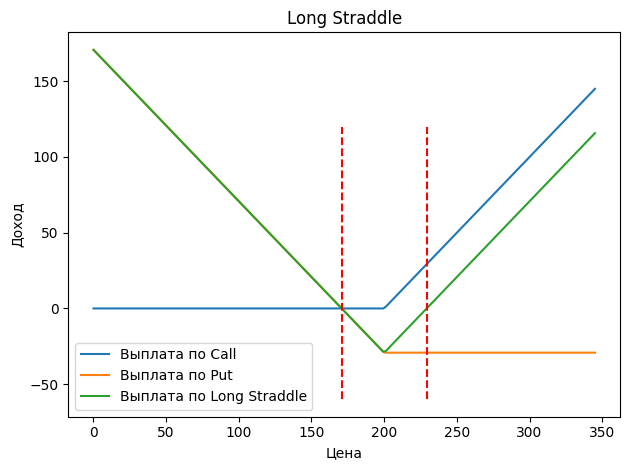

In [7]:
prices = np.linspace(0, S*2, 200)

payoff_long_call = np.where(prices - K_long_call > 0, prices - K_long_call, 0) - premium_long_call
payoff_long_put = np.where(K_long_put - prices > 0, K_long_put - prices, 0) - premium_long_put

payoff_long_straddle = payoff_long_call + payoff_long_put

print(f'MAX: {max(payoff_long_straddle)}')
print(f'MIN: {min(payoff_long_straddle)}')

plt.plot(prices, payoff_long_call, label='Выплата по Call')
plt.plot(prices, payoff_long_put, label='Выплата по Put')
plt.plot(prices, payoff_long_straddle, label='Выплата по Long Straddle')

plt.plot(np.ones(30) * (K_long_call + premium_long_call + premium_long_put), np.linspace(-60, 120, 30), '--', color='red')
plt.plot(np.ones(30) * (K_long_put  - premium_long_put - premium_long_call), np.linspace(-60, 120, 30), '--', color='red')


plt.title('Long Straddle')
plt.xlabel('Цена')
plt.ylabel('Доход')
plt.legend()
plt.tight_layout()
plt.show()

# Биноминальная модель

In [8]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [9]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


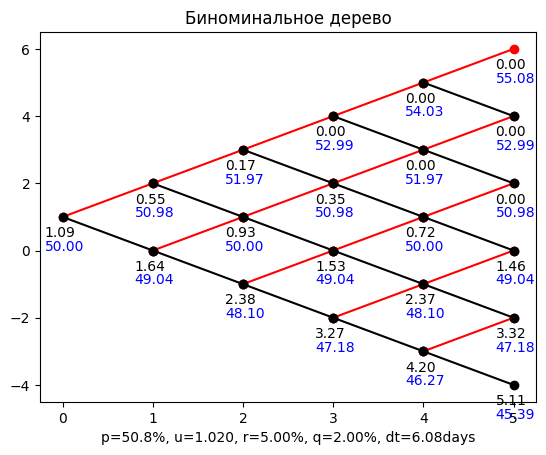

1.0853174417962133

In [10]:
r, q, sigma, tau, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, tau, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Биноминальное дерево, Американский опцион кол, функция выплат max(S-K, 0)


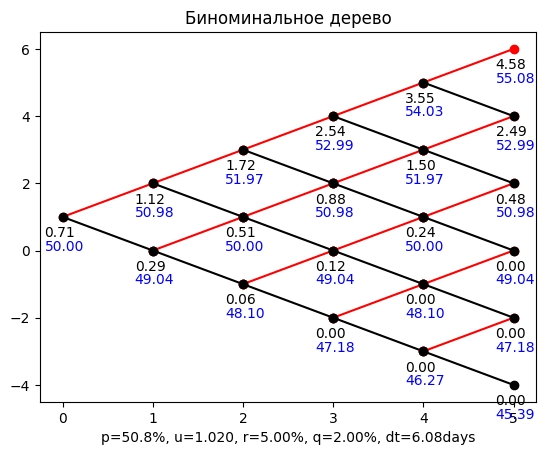

0.7120324211650718

In [11]:
# Americal Call
print("Биноминальное дерево, Американский опцион кол, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, tau, n, S, lambda S: max(S-K,0), american=True, showStatePrices=True)

Биноминальное дерево, Американский опцион кол, функция выплат max(S-K, 0)


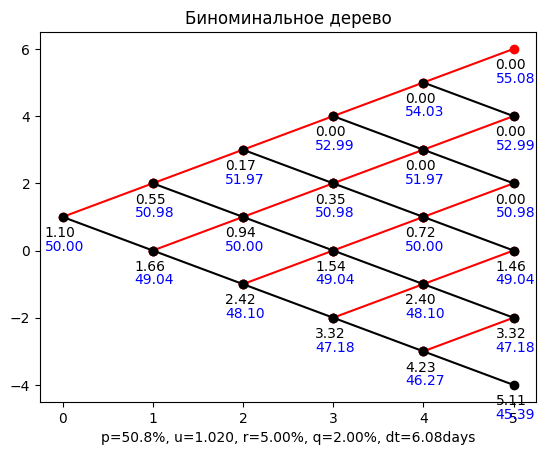

1.0962783164249443

In [12]:
# Americal Put
print("Биноминальное дерево, Американский опцион кол, функция выплат max(S-K, 0)")
binomial_tree_pricer(r, q, sigma, tau, n, S, lambda S: max(K-S,0), american=True, showStatePrices=True)

Биноминальное дерево, европейский опцион кол, функция выплат max(K-S, 0)


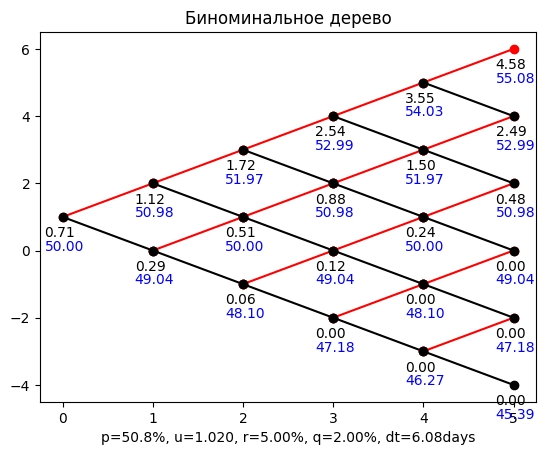

0.7120324211650718

In [13]:
print("Биноминальное дерево, европейский опцион кол, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, tau, n, S, lambda S: max(S-K,0), american=False, showStatePrices=True)

Выводы:

Американские опционы: На каждом шаге в модели биномиального дерева для американских опционов оценивается целесообразность досрочного исполнения. Это может приводить к их более высокой стоимости по сравнению с европейскими опционами, если досрочное исполнение является выгодным.


Европейские опционы: Возможность досрочного исполнения отсутствует, поэтому их стоимость всегда равна или ниже стоимости американских опционов при одинаковых условиях.

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [16]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

# Модель БШ

Цена опциона кол:     $C=S_0 N(d_1) - Ke^{-r\tau}*N(d_2)$


Цена опциона пут: $P=Ke^{-r\tau}*N(-d_2) - S_0N(-d_1)$


где $d_1= \frac{\ln{\frac{S_0}{K}}+(r + \frac{\sigma^2}{2})T}{\sigma\sqrt{\tau}}$, $d_2=d_1 - \sigma\sqrt{\tau}$


# Греки

1. Дельта:  $\Delta_C = N(d_1)$, $\Delta_P = N(d_1) - 1$

2. Гамма: $\Gamma = \frac{N'(d_1)}{S_0\sigma\sqrt{\tau}}$, где $N'(d_1)=\frac{1}{\sqrt{2\pi}e^{-\frac{d_1^2}{2}}}$

3. Тета: $\Theta_C=-\frac{S_0N'(d_1)\sigma}{2\sqrt{\tau}}-rKe^{-r\tau}N(d_2)$, $\Theta_P=-\frac{S_0N'(d_1)\sigma}{2\sqrt{\tau}}+rKe^{-rT}N(-d_2)$

4. Bега: $v=S_0\sqrt{\tau}N'(d_1)$

5. Ро: $\rho_C=K\tau e^{-r\tau}N(d_2)$, $\rho_P=-K\tau e^{-r\tau}N(-d_2)$

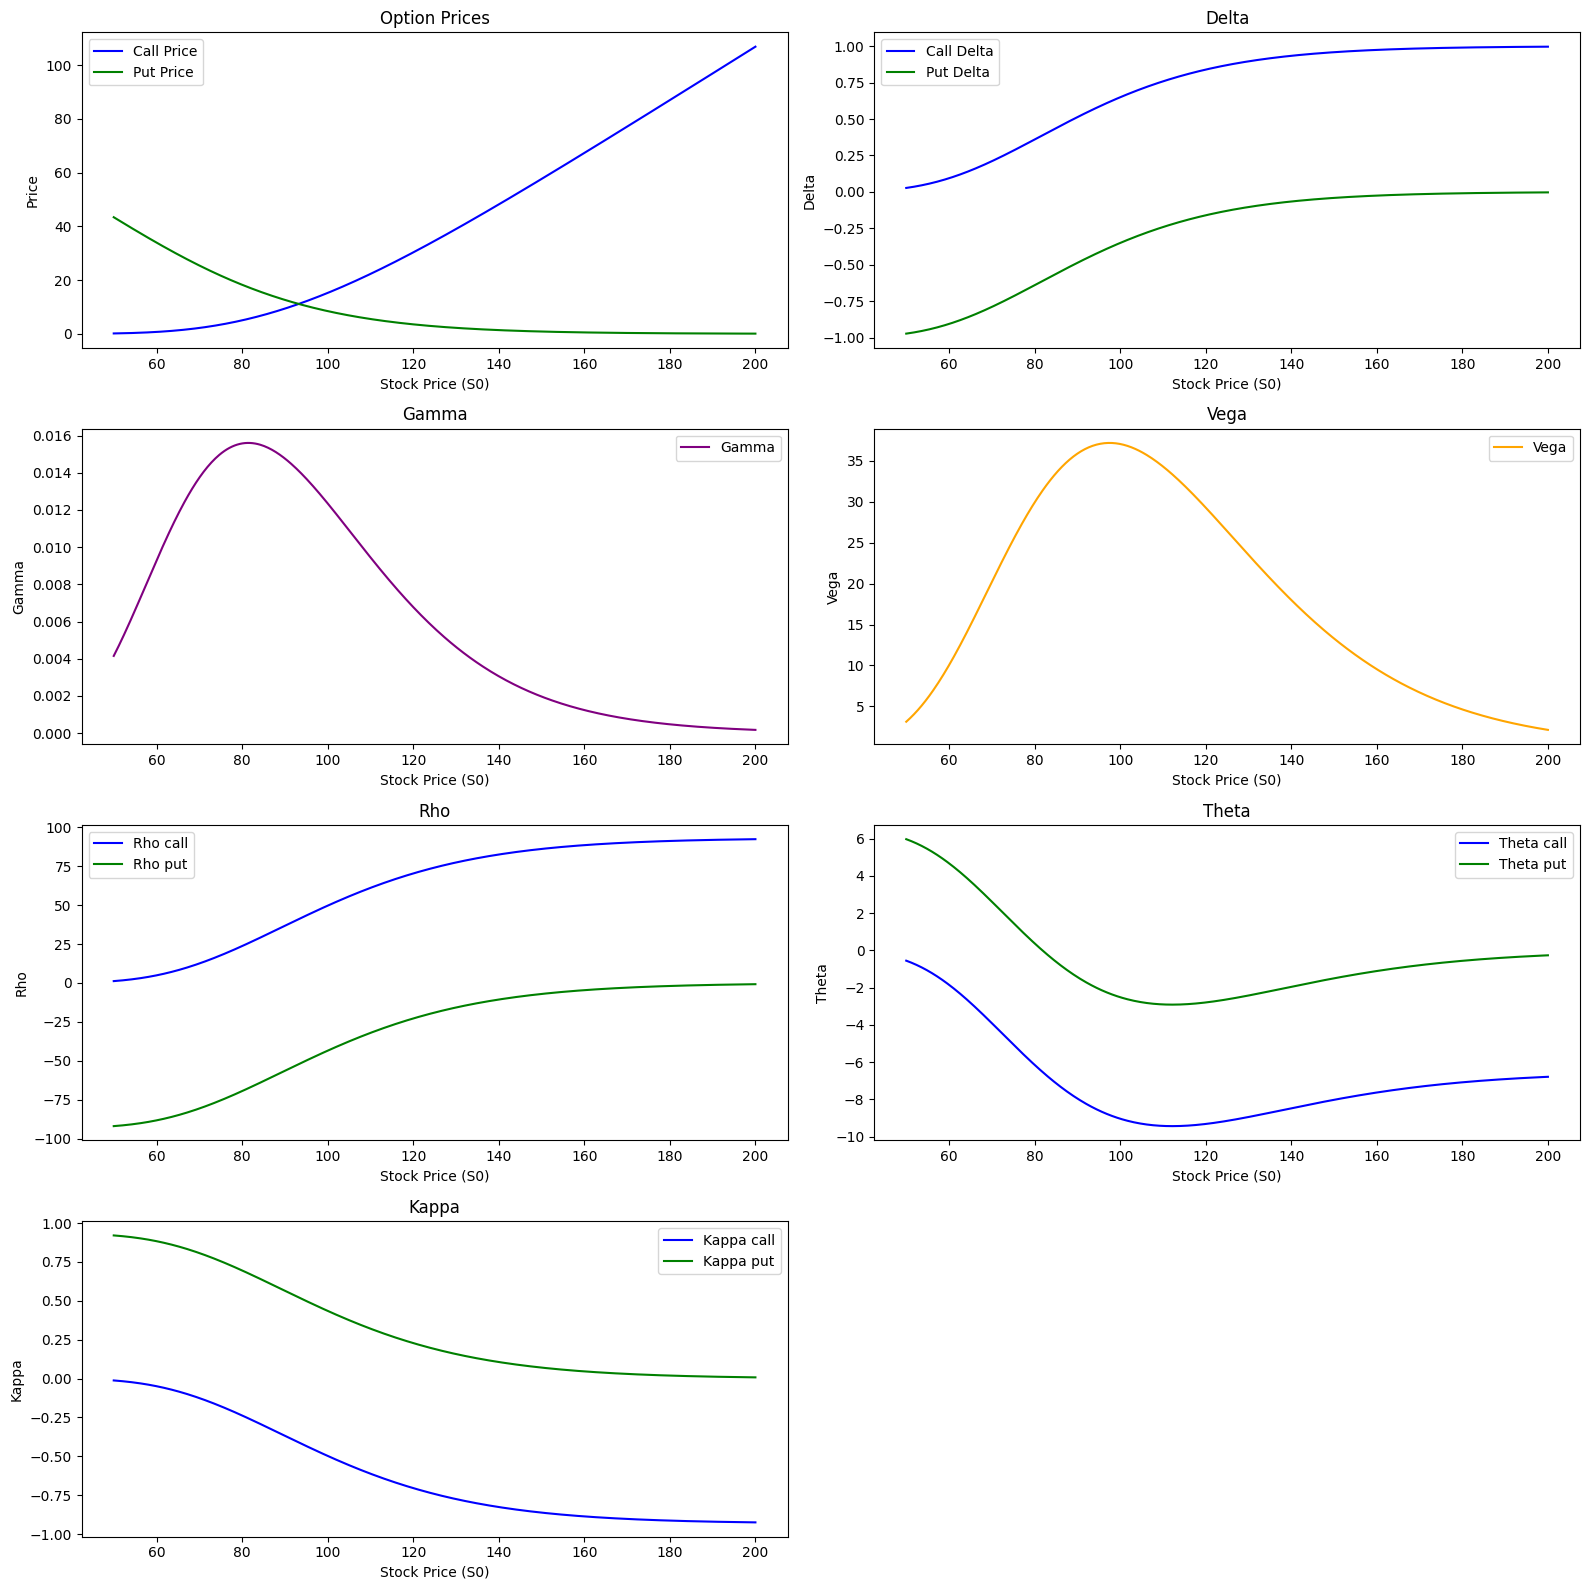

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

S0_range = np.linspace(S0*.5, S0*2, 500)  # от 50 до 150

# Формулы Блэка-Шоулза
def black_scholes(S0, K, r, sigma, tau):
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    put_price = K * np.exp(-r * tau) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    delta_call = norm.cdf(d1)
    delta_put = norm.cdf(d1) - 1
    
    gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(tau))
    
    theta_call = (-S0 * norm.pdf(d1) * sigma / (2 * np.sqrt(tau))
                  - r * K * np.exp(-r * tau) * norm.cdf(d2))
    theta_put = (-S0 * norm.pdf(d1) * sigma / (2 * np.sqrt(tau))
                 + r * K * np.exp(-r * tau) * norm.cdf(-d2))
    
    vega = S0 * np.sqrt(tau) * norm.pdf(d1)
    
    rho_call = K * tau * np.exp(-r * tau) * norm.cdf(d2)
    rho_put = -K * tau * np.exp(-r * tau) * norm.cdf(-d2)

    
    kappa_call = -np.exp(-r*T)*norm.cdf(d2) 
    kappa_put = np.exp(-r * T) * norm.cdf(-d2)
    
    return {
        "call_price": call_price,
        "put_price": put_price,
        "delta_call": delta_call,
        "delta_put": delta_put,
        "gamma": gamma,
        "theta_call": theta_call,
        "theta_put": theta_put,
        "vega": vega,
        "rho_call": rho_call,
        "rho_put": rho_put,
        "kappa_call": kappa_call,
        "kappa_put": kappa_put,
    }

results = black_scholes(S0_range, K, r, sigma, tau)

plt.figure(figsize=(16, 16))

plt.subplot(4, 2, 1)
plt.plot(S0_range, results["call_price"], label="Call Price", color="blue")
plt.plot(S0_range, results["put_price"], label="Put Price", color="green")
plt.title("Option Prices")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Price")
plt.legend()

# Дельта
plt.subplot(4, 2, 2)
plt.plot(S0_range, results["delta_call"], label="Call Delta", color="blue")
plt.plot(S0_range, results["delta_put"], label="Put Delta", color="green")
plt.title("Delta")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Delta")
plt.legend()

# Гамма
plt.subplot(4, 2, 3)
plt.plot(S0_range, results["gamma"], label="Gamma", color="purple")
plt.title("Gamma")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Gamma")
plt.legend()

# Вега
plt.subplot(4, 2, 4)
plt.plot(S0_range, results["vega"], label="Vega", color="orange")
plt.title("Vega")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Vega")
plt.legend()

# Ро
plt.subplot(4, 2, 5)
plt.plot(S0_range, results["rho_call"], label="Rho call", color="blue")
plt.plot(S0_range, results["rho_put"], label="Rho put", color="green")
plt.title("Rho")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Rho")
plt.legend()

# Theta
plt.subplot(4, 2, 6)
plt.plot(S0_range, results["theta_call"], label="Theta call", color="blue")
plt.plot(S0_range, results["theta_put"], label="Theta put", color="green")
plt.title("Theta")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Theta")
plt.legend()


# Kappa
plt.subplot(4, 2, 7)
plt.plot(S0_range, results["kappa_call"], label="Kappa call", color="blue")
plt.plot(S0_range, results["kappa_put"], label="Kappa put", color="green")
plt.title("Kappa")
plt.xlabel("Stock Price (S0)")
plt.ylabel("Kappa")
plt.legend()

plt.tight_layout()
plt.show()


## Задача (оценка и паритет)

In [18]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [19]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
  # ваш код
  d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return K * np.exp(-r * tau) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

In [20]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [21]:
# ваш код
print(f'Паритетная цена: {put_paritet(S0, K, tau, sigma, r, q)}')
print(f'Оценка цены пута: {put(S0, K, tau, sigma, r, q)}')
print(f'difference: {put_paritet(S0, K, tau, sigma, r, q) - put(S0, K, tau, sigma, r, q)}')

Паритетная цена: 8.44988262632198
Оценка цены пута: 8.449882626321987
difference: -7.105427357601002e-15


In [22]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {tau}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, tau, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, tau, sigma, r, q)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [23]:
def get_d1(S, K, r, T, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def get_d2(S, K, r, T, sigma):
    return get_d1(S, K, r, T, sigma) - sigma * np.sqrt(T)

def call_price(S, K, r, T, sigma):
    return S * norm.cdf(get_d1(S, K, r, T, sigma)) - K * np.exp(-r * T) * norm.cdf(get_d2(S, K, r, T, sigma))

def put_price(S, K, r, T, sigma):
    return K * np.exp(-r * T) * norm.cdf(-get_d2(S, K, r, T, sigma)) - S * norm.cdf(-get_d1(S, K, r, T, sigma))

# Численные приближения греков
def numerical_delta(S, K, r, T, sigma, option, h=1e-3):
    return (option(S + h, K, r, T, sigma) - option(S - h, K, r, T, sigma)) / (2 * h)
    # return (option(S + h, K, r, T, sigma) - option(S - h, K, r, T, sigma)) / (2 * h)

def numerical_gamma(S, K, r, T, sigma, option, h=1e-3):
    return (option(S + h, K, r, T, sigma) - 2 * option(S, K, r, T, sigma) + option(S - h, K, r, T, sigma)) / (h ** 2)

def numerical_vega(S, K, r, T, sigma, option, h=1e-3):
    return (option(S, K, r, T, sigma + h) - option(S, K, r, T, sigma - h)) / (2 * h)

def numerical_theta(S, K, r, T, sigma, option, h=1e-3):
    return (option(S, K, r, T - h, sigma) - option(S, K, r, T + h, sigma)) / (2 * h)

def numerical_rho(S, K, r, T, sigma, option, h=1e-3):
    return (option(S, K, r + h, T, sigma) - option(S, K, r - h, T, sigma)) / (2 * h)

def numerical_kappa(S, K, r, T, sigma, option, h=1e-3):
    return (option(S, K + h, r, T, sigma) - option(S, K - h, r, T, sigma)) / (2 * h)

In [24]:
def plot_numerical_greeks(S, K, r, T, sigma, option_type):
    # Вычисляем точные значения греков
    h=1e-3

    # S0_range = np.arange(start=0, stop=S*2, step=h) + h
    S0_range = np.linspace(0, S*2, 100) + h

    results = black_scholes(S0_range, K, r, sigma, tau)

    
    delta_exact = results[f'delta_{option_type.lower()}']
    gamma_exact = results[f'gamma']
    vega_exact = results[f'vega']
    theta_exact = results[f'theta_{option_type.lower()}']
    rho_exact = results[f'rho_{option_type.lower()}']
    kappa_exact = results[f'kappa_{option_type.lower()}']

    option_funcs = {'call': call_price, 'put': put_price}

    # Численные значения греков
    delta_numerical = [numerical_delta(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]
    gamma_numerical = [numerical_gamma(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]
    vega_numerical = [numerical_vega(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]
    theta_numerical = [numerical_theta(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]
    rho_numerical = [numerical_rho(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]
    kappa_numerical = [numerical_kappa(s, K, r, T, sigma, option_funcs[option_type.lower()]) for s in S0_range]

    # Построение графиков
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 3, 1)
    plt.plot(S0_range, delta_exact, label='Delta (Exact)')
    plt.plot(S0_range, delta_numerical, '--', label='Delta (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Delta')
    plt.legend()
    plt.title('Delta Comparison')

    plt.subplot(2, 3, 2)
    plt.plot(S0_range, gamma_exact, label='Gamma (Exact)')
    plt.plot(S0_range, gamma_numerical, '--', label='Gamma (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Gamma')
    plt.legend()
    plt.title('Gamma Comparison')

    plt.subplot(2, 3, 3)
    plt.plot(S0_range, theta_exact, label='Theta (Exact)')
    plt.plot(S0_range, theta_numerical, '--', label='Theta (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Theta')
    plt.legend()
    plt.title('Theta Comparison')

    plt.subplot(2, 3, 4)
    plt.plot(S0_range, kappa_exact, label='Kappa (Exact)')
    plt.plot(S0_range, kappa_numerical, '--', label='Kappa (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Kappa')
    plt.legend()
    plt.title('Kappa Comparison')

    plt.subplot(2, 3, 5)
    plt.plot(S0_range, vega_exact, label='Vega (Exact)')
    plt.plot(S0_range, vega_numerical, '--', label='Vega (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Vega')
    plt.legend()
    plt.title('Vega Comparison')

    plt.subplot(2, 3, 6)
    plt.plot(S0_range, rho_exact, label='Rho (Exact)')
    plt.plot(S0_range, rho_numerical, '--', label='Rho (Numerical)')
    plt.xlabel('S')
    plt.ylabel('Rho')
    plt.legend()
    plt.title('Rho Comparison')

    plt.tight_layout()
    plt.show()

In [25]:
# ваш код
S = 80
K = 100  # страйк
r = 0.07  # процентная ставка
T = 1  # время до исполнения
sigma = 0.2  # волатильность

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_58590/1123109019.py:2: RuntimeWarning: divide by zero encountered in log
  return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


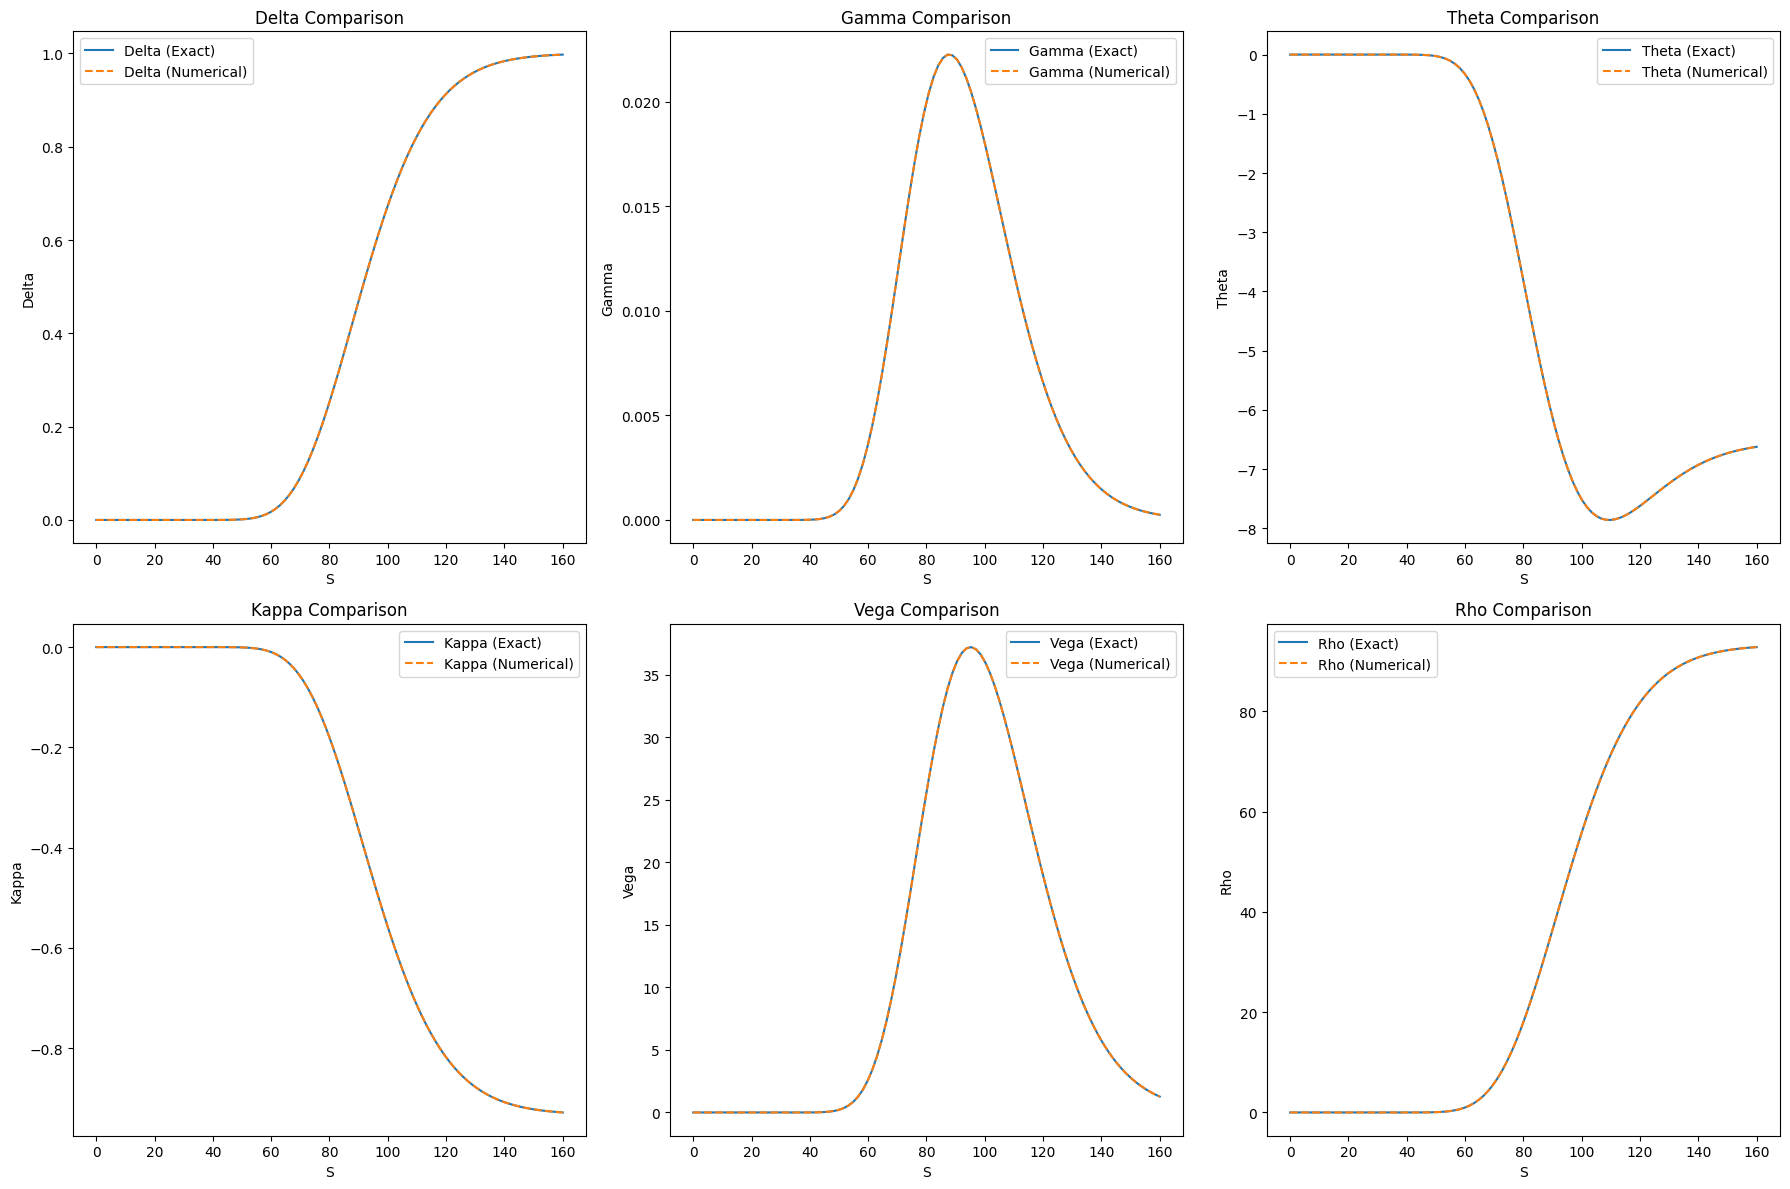

In [26]:
plot_numerical_greeks(S, K, r, T, sigma, 'call')

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_58590/1123109019.py:2: RuntimeWarning: divide by zero encountered in log
  return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


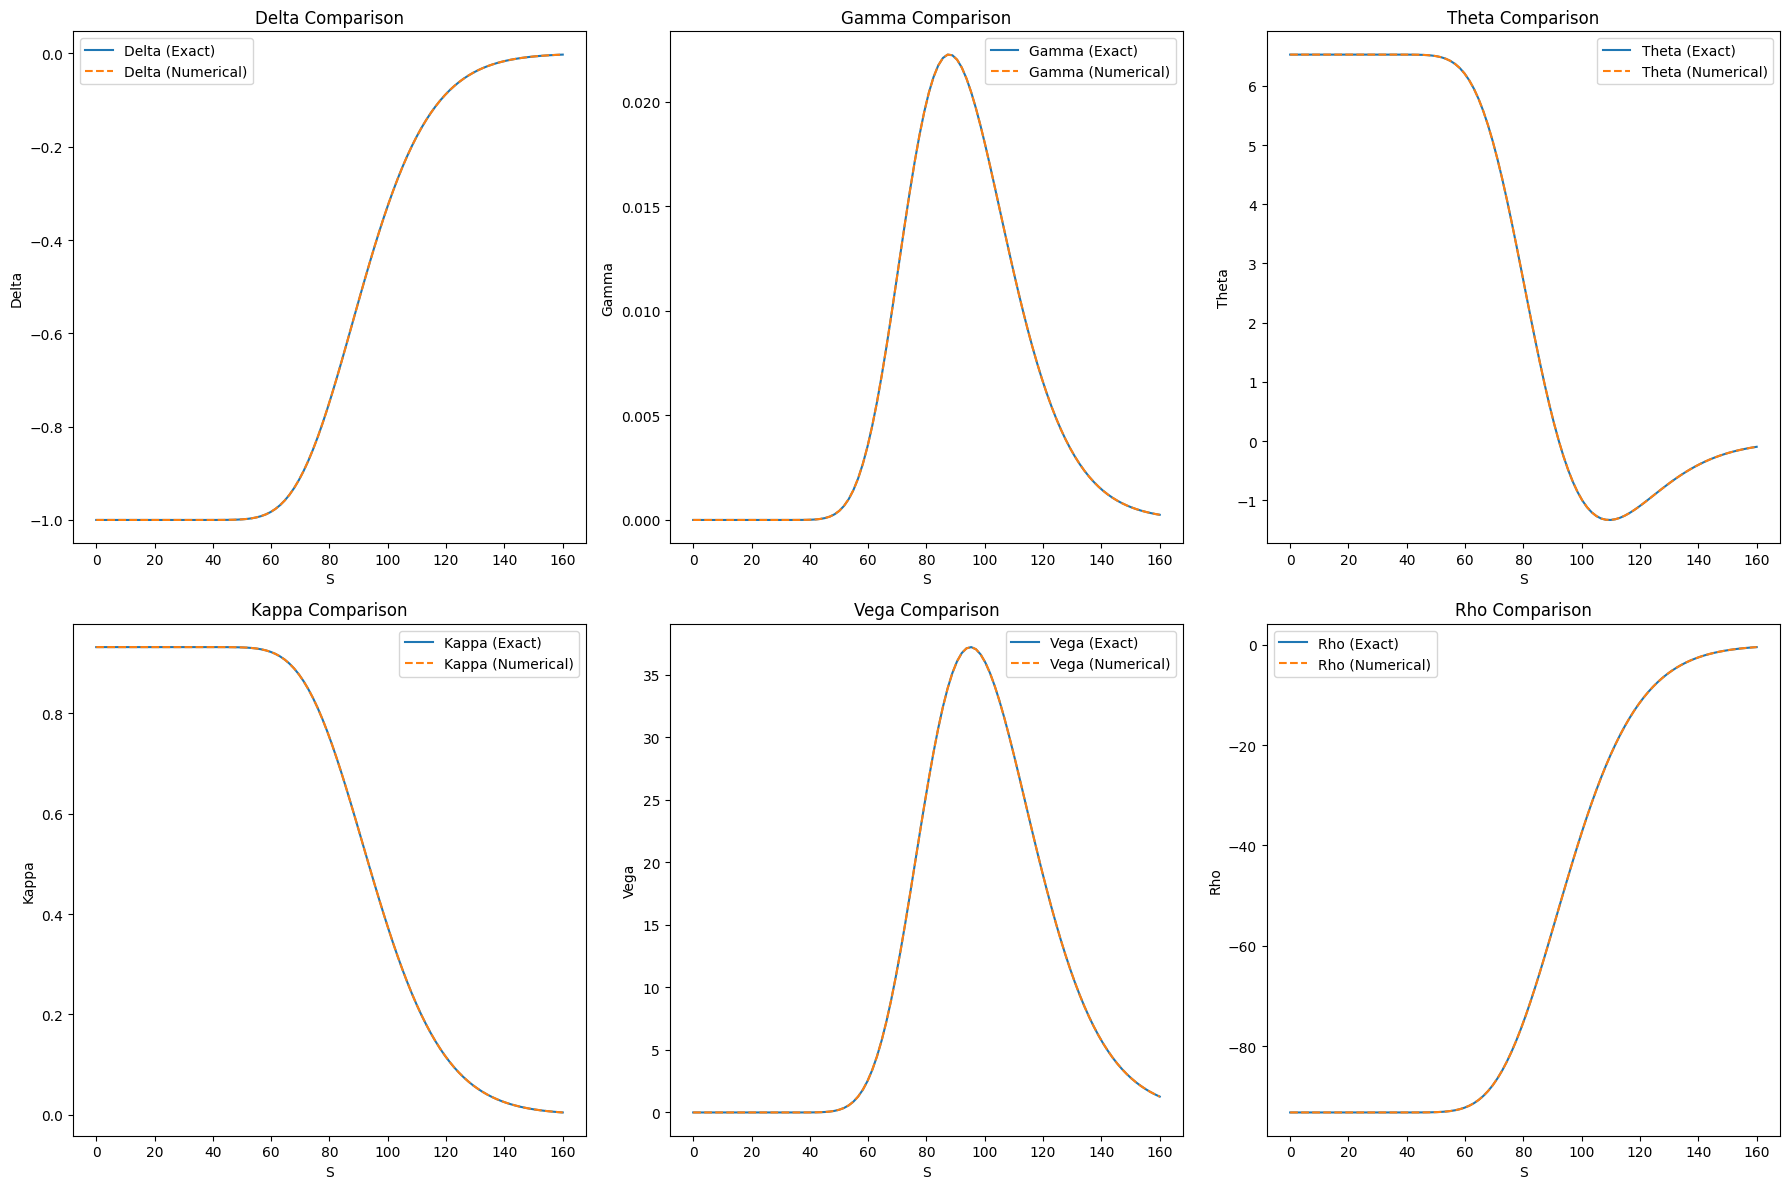

In [27]:
plot_numerical_greeks(S, K, r, T, sigma, 'put')

Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

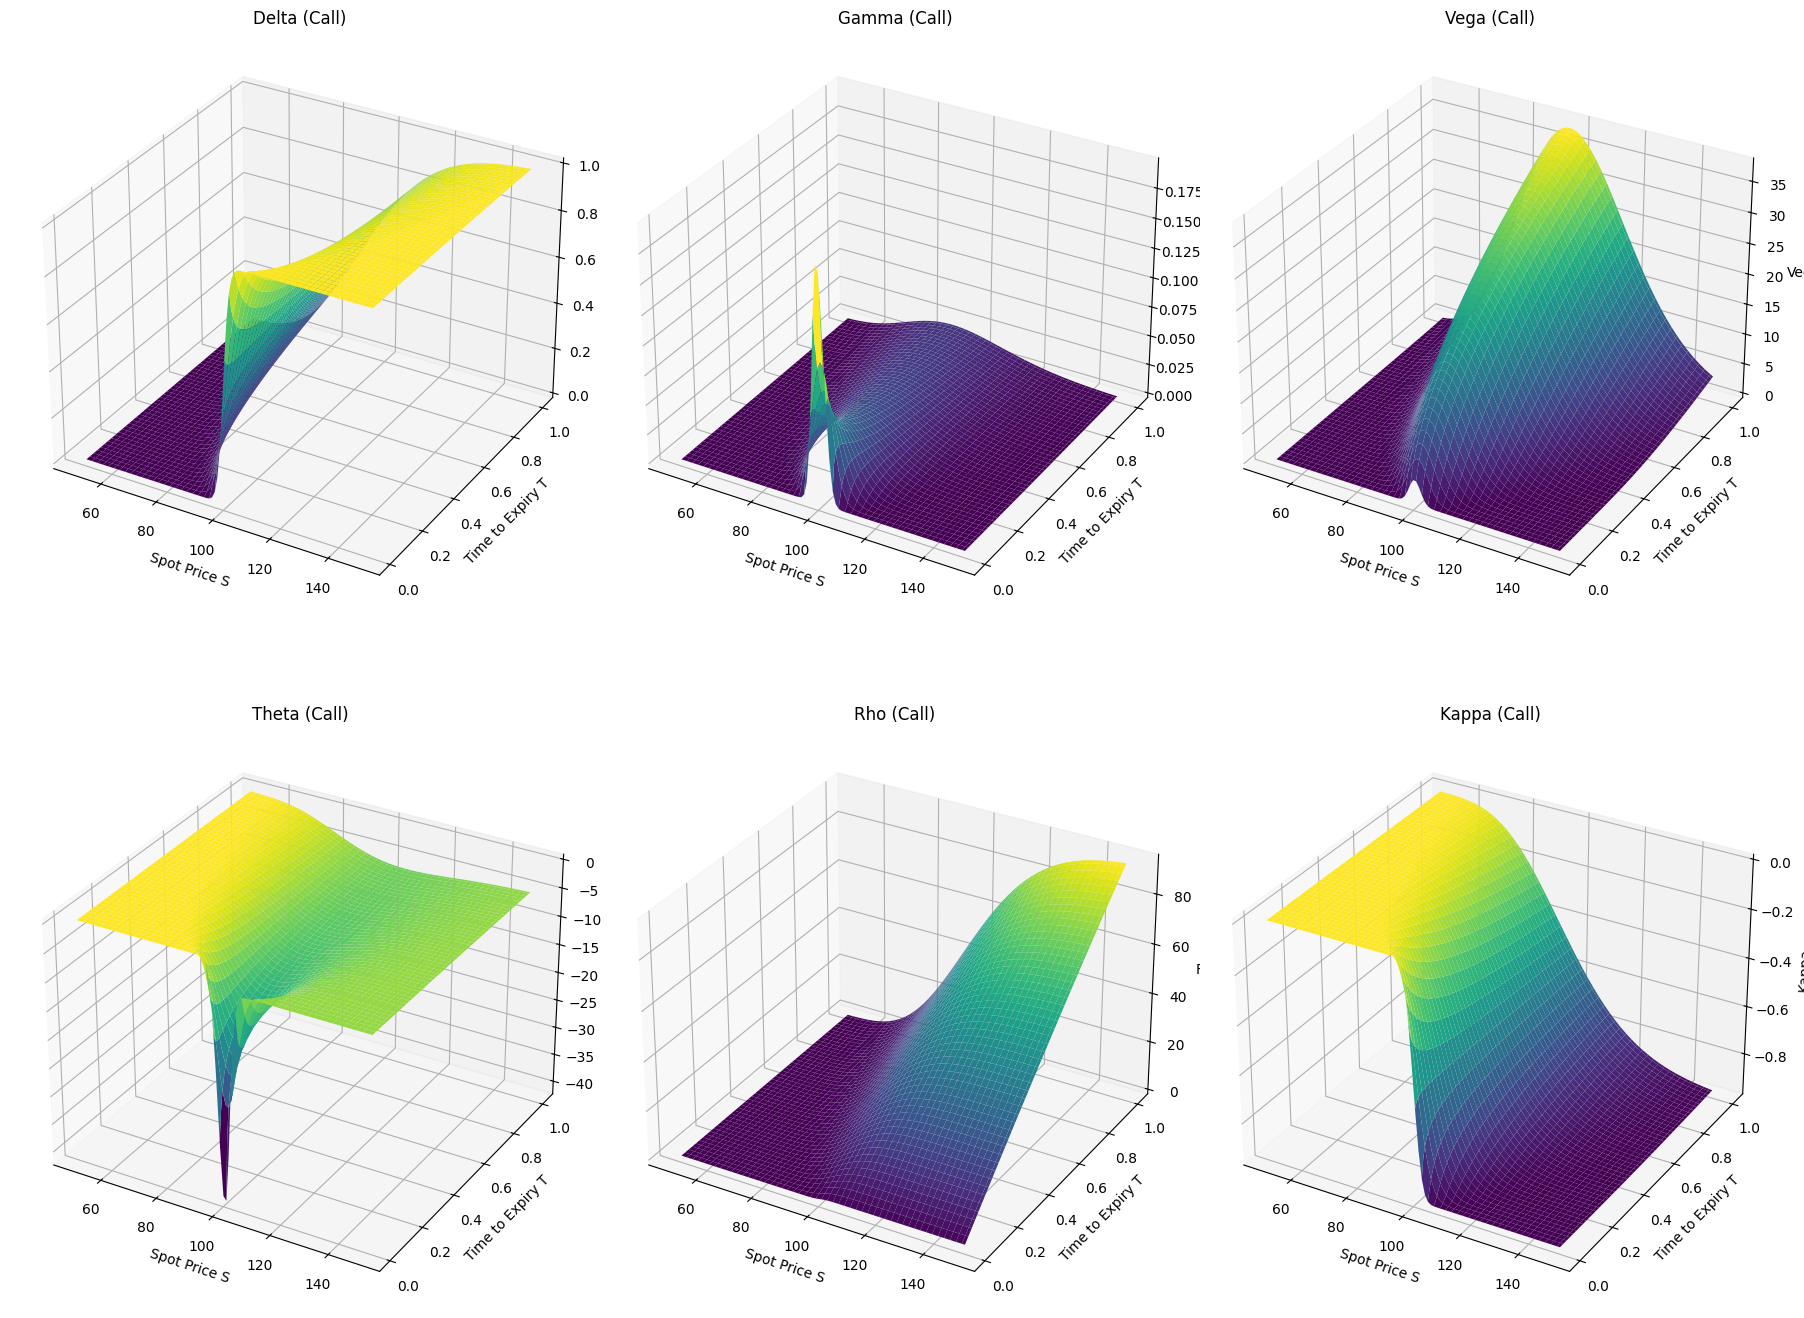

In [28]:
K = 100  
r = 0.05 
sigma = 0.2

S0_range = np.linspace(50, 150, 100)
T0_range = np.linspace(0.01, 1, 100)


S_grid, T_grid = np.meshgrid(S0_range, T0_range)


fig = plt.figure(figsize=(18, 15))

for i, greek_name in enumerate(['delta', 'gamma', 'vega', 'theta', 'rho', 'kappa']):

        results = black_scholes(S_grid, K, r, sigma, T_grid)
        
        if greek_name == 'delta':
            Z = results['delta_call']
        elif greek_name == 'gamma':
            Z = results['gamma']
        elif greek_name == 'vega':
            Z = results['vega']
        elif greek_name == 'theta':
            Z = results['theta_call']
        elif greek_name == 'rho':
            Z = results['rho_call']
        elif greek_name == 'kappa':
            Z = results['kappa_call']

        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(S_grid, T_grid, Z, cmap='viridis')
        ax.set_title(f'{greek_name.capitalize()} (Call)')
        ax.set_xlabel('Spot Price S')
        ax.set_ylabel('Time to Expiry T')
        ax.set_zlabel(greek_name.capitalize())

plt.tight_layout()
plt.show()

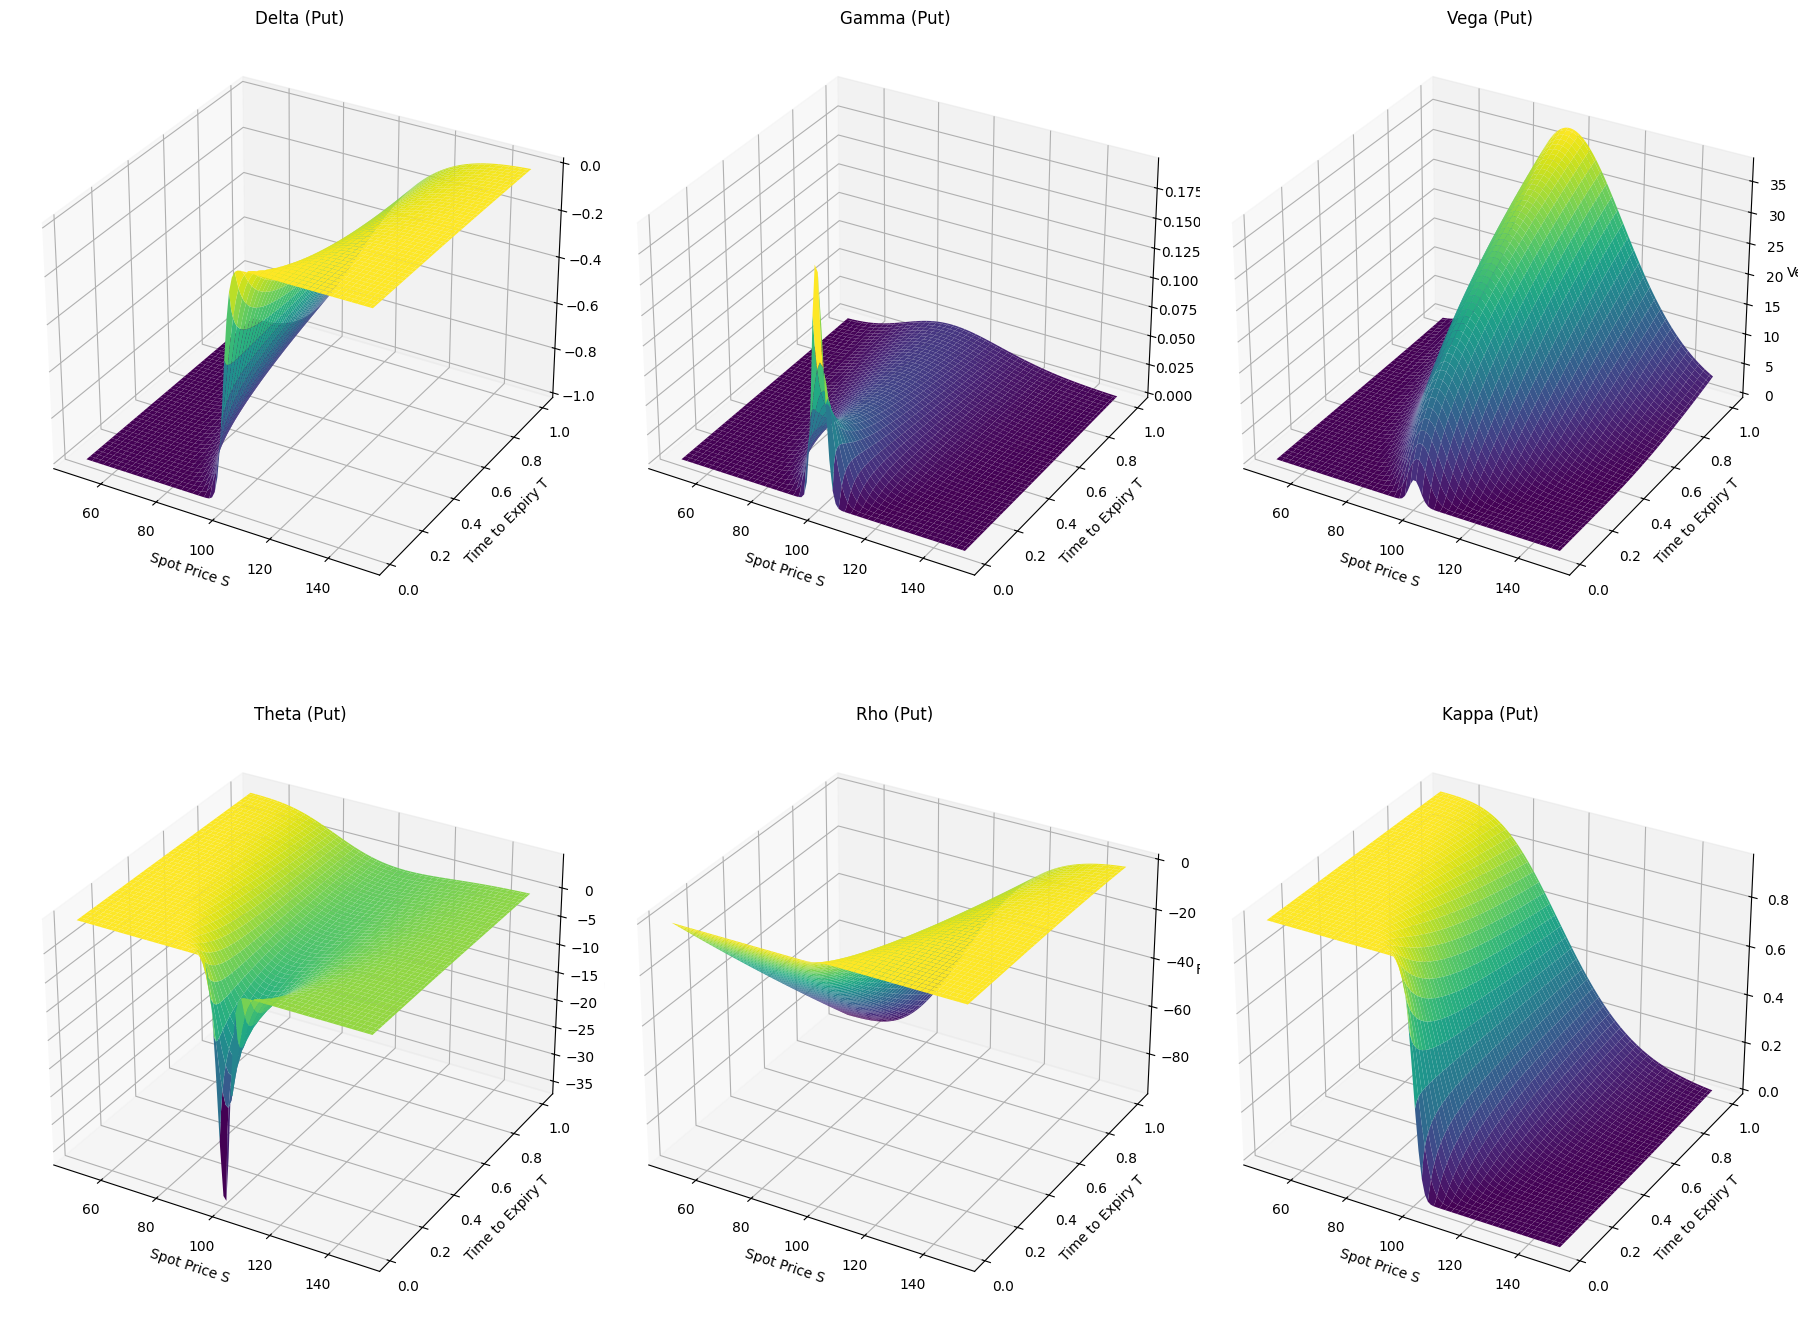

In [29]:
K = 100  
r = 0.05 
sigma = 0.2

S0_range = np.linspace(50, 150, 100)
T0_range = np.linspace(0.01, 1, 100)


S_grid, T_grid = np.meshgrid(S0_range, T0_range)


fig = plt.figure(figsize=(18, 15))

for i, greek_name in enumerate(['delta', 'gamma', 'vega', 'theta', 'rho', 'kappa']):

        results = black_scholes(S_grid, K, r, sigma, T_grid)
        
        if greek_name == 'delta':
            Z = results['delta_put']
        elif greek_name == 'gamma':
            Z = results['gamma']
        elif greek_name == 'vega':
            Z = results['vega']
        elif greek_name == 'theta':
            Z = results['theta_put']
        elif greek_name == 'rho':
            Z = results['rho_put']
        elif greek_name == 'kappa':
            Z = results['kappa_put']

        ax = fig.add_subplot(2, 3, i+1, projection='3d')
        ax.plot_surface(S_grid, T_grid, Z, cmap='viridis')
        ax.set_title(f'{greek_name.capitalize()} (Put)')
        ax.set_xlabel('Spot Price S')
        ax.set_ylabel('Time to Expiry T')
        ax.set_zlabel(greek_name.capitalize())

plt.tight_layout()
plt.show()

# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy),
$i$ и $i+12$, где $i$ -- ваша фамилия по алфавиту:

1.   Покупка опциона колл. Long Call
1. Продажа опциона колл. Short Call
1. Покупка опциона пут. Long Put
1. Продажа опциона пут. Short Put
1. Бычий колл спрэд. Bull Call Spread
1. Бычий пут спрэд. Bull Put Spread
1. Медвежий колл спрэд. Bear Call Spread
1. Медвежий пут спрэд. Bear Put Spread
1. Покупка бабочки. Long Butterfly
1. Продажа бабочки. Short Butterfly
1. Покупка кондора. Long Condor
1. Продажа кондора. Short Condor
1. Покупка стрэддла. Long Straddle
1. Продажа стрэддла. Short Straddle
1. Покупка стрэнгла. Long Strangle
1. Продажа стрэнгла. Short Strangle
1. Пропорциональный колл спрэд. Call Ratio Spread
1. Пропорциональный пут спрэд. Put Ratio Spread
1. Пропорциональный обратный колл спрэд. Call Ratio Backspread
1. Пропорциональный обратный пут спрэд. Put Ratio Backspread
1. Синтетический длинный фьючерс. Synthetic Long Futures
1. Синтетический короткий фьючерс. Synthetic Short Futures
1. Стрэп. Strap
1. Стрип. Strip
1. Обратный бычий спрэд. Bull Backspread
1. Обратный медвежий спрэд. Bear Backspread

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

# i = 10

In [35]:
# look AAPL

spot_price = 225.89
ATM_call_price_long = 4.30 # p = 225.00
ATM_strike = 225
OTM_call_premia_high = 0.82 # p = 232.5  -- short
OTM_strike = 232.5
ITM_call_premia_low = 10.32 # p = 217.5 -- short
ITM_strike = 217.5

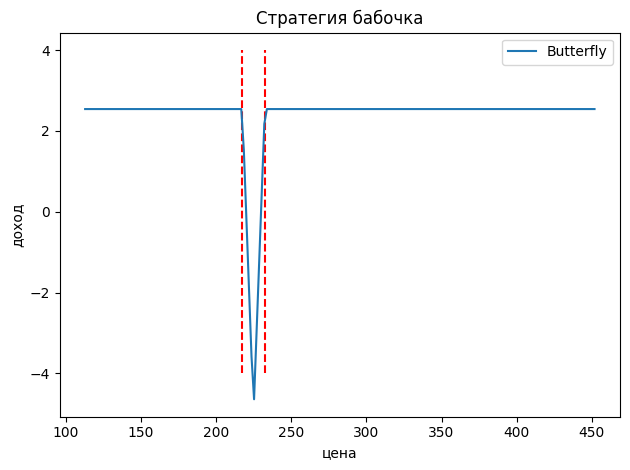

In [39]:
S = np.linspace(spot_price*0.5, spot_price*2, 200)

ATM_payoff = np.where(S-ATM_strike > 0, S-ATM_strike, 0) * 2- 2*ATM_call_price_long
OTM_payoff = -np.where(S-OTM_strike > 0, S-OTM_strike, 0) + OTM_call_premia_high
ITM_payoff = -np.where(S-ITM_strike > 0, S-ITM_strike, 0) + ITM_call_premia_low


plt.plot(np.ones(10) * OTM_strike, np.linspace(-4, 4, 10), 'r--')
plt.plot(np.ones(10) * ITM_strike, np.linspace(-4, 4, 10), 'r--')
plt.plot(S, ATM_payoff + OTM_payoff + ITM_payoff, label='Butterfly')


plt.title('Стратегия бабочка')
plt.xlabel('цена')
plt.ylabel('доход')
plt.legend()
plt.tight_layout()
plt.show()

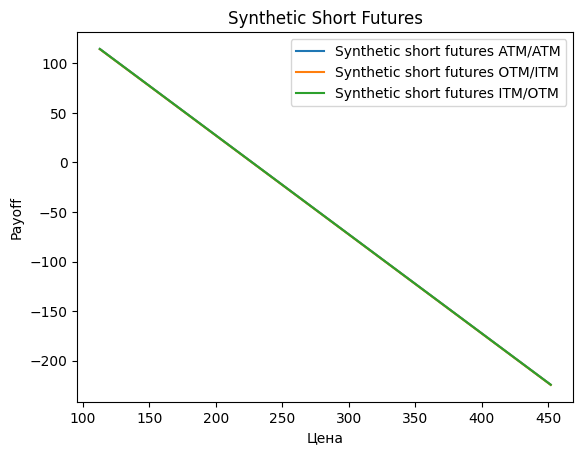

In [41]:
# Возьмем At the money - short call, long put
ATM_short_call_premia = 4.15
ATM_call_strike = 225.
ATM_long_put_premia = 1.63
ATM_put_strike = 225.

S = np.linspace(spot_price*.5, spot_price*2, 200)

ATM_put_payoff = np.where(S-ATM_put_strike > 0, 0, ATM_put_strike - S) - ATM_long_put_premia
ATM_call_payoff = np.where(S-ATM_call_strike > 0, ATM_call_strike - S, 0) + ATM_short_call_premia

synthetic_short_futures_payoff = ATM_put_payoff + ATM_call_payoff

plt.plot(S, synthetic_short_futures_payoff, label='Synthetic short futures ATM/ATM')

OTM_short_call_premia = 0.82
OTM_call_strike = 232.5
ITM_long_put_premia = 6.05
ITM_put_strike = 232.5

S = np.linspace(spot_price*.5, spot_price*2, 200)

ITM_put_payoff = np.where(S-ITM_put_strike > 0, 0, ITM_put_strike - S) - ITM_long_put_premia
OTM_call_payoff = np.where(S-OTM_call_strike > 0, OTM_call_strike - S, 0) + OTM_short_call_premia

synthetic_short_futures_payoff = ITM_put_payoff + OTM_call_payoff

plt.plot(S, synthetic_short_futures_payoff, label='Synthetic short futures OTM/ITM')

ITM_short_call_premia = 8.05
ITM_call_strike = 220.
OTM_long_put_premia = 0.61
OTM_put_strike = 220.

S = np.linspace(spot_price*.5, spot_price*2, 200)

OTM_put_payoff = np.where(S-OTM_put_strike > 0, 0, OTM_put_strike - S) - OTM_long_put_premia
ITM_call_payoff = np.where(S-ITM_call_strike > 0, ITM_call_strike - S, 0) + ITM_short_call_premia

synthetic_short_futures_payoff = OTM_put_payoff + ITM_call_payoff

plt.plot(S, synthetic_short_futures_payoff, label='Synthetic short futures ITM/OTM')

plt.title('Synthetic Short Futures')
plt.xlabel('Цена')
plt.ylabel('Payoff')
plt.legend()
plt.show()


## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $
X=\{X_c, X_p\},
$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [97]:
import pandas as pd

In [115]:
df = pd.DataFrame({'bid': [22.55, 20.10, 17.5, 15.15, 12.7, 10.3, 8.05, 5.90,4.00, 
              2.49, 1.38, 0.67, .29, .12, .05, .03, .09, .11, .13, .17, 
              .23, .33, .51, .85, 1.44, 2.4, 3.75, 5.55, 7.7, 10.1, 
              12.65, 15.15],
     'ask' : [2.80, 20.30, 17.95, 15.40, 12.95, 10.55, 8.20, 6.,
              4.10, 2.53, 1.39, 0.69, .31, .13, .06, 0.04, .1, 
                .12, .14, .18, .24, .34, .52, .87, 1.47, 2.44, 
               3.90, 5.75, 7.95, 10.35, 12.9,15.35],
    'volume': [685, 4, 1, 7, 96, 501, 356, 6458, 11246, 20444,
              7469, 9481, 3516, 6681, 780, 754, 632, 276, 263, 
              1013, 637, 3691, 3899, 8163, 5300, 3304, 2381,
              1130, 31, 34, 1, 5],
    'strike': [207.5, 210., 212.5, 215.0, 217.5, 220., 222.5, 225., 227.5, 230., 232.5, 
              235., 237.5, 240., 242.5, 245.,207.5, 210., 212.5, 215.0, 217.5, 220., 
              222.5, 225., 227.5, 230., 232.5, 235., 237.5, 240., 242.5, 245.],
    'option': ['call'] * 16 + ['put'] * 16
})

In [122]:
from scipy.optimize import minimize
import numpy as np

n = 16 # Количество опционов
S0 = 275.  # Цена базового актива
L = -10  # Нижняя граница количества контрактов
U = 10  # Верхняя граница количества контрактов
w = 1000  # Максимальная стоимость стратегии
L_max = 200  # Максимальный убыток


K = df[df['option'] == 'call'].strike.values
ask_call = df[df['option'] == 'call'].ask.values
bid_call = df[df['option'] == 'call'].bid.values
ask_put = df[df['option'] == 'put'].ask.values
bid_put = df[df['option'] == 'put'].bid.values


S_T = np.linspace(S0 * .5, S0 * 1.5, len(K))


payoff_call = np.maximum(S_T[:, None] - K, 0)  
payoff_put = np.maximum(K - S_T[:, None], 0) 

def objective(x):
    x_c, x_p = x[:n], x[n:]
    return np.sum(x_c * ask_call + x_p * ask_put)

bounds = [(L, U)] * (2 * n)

def cost_constraint(x):
    x_c, x_p = x[:n], x[n:]
    return w - np.sum(x_c * ask_call + x_p * ask_put)

def loss_constraint(x):
    x_c, x_p = x[:n], x[n:]
    profit = np.sum( np.expand_dims(x_c, axis=1) * payoff_call.T +  np.expand_dims(x_p, axis=1) * payoff_put.T, axis=1)
    return L_max + profit.min()

constraints = [
    {"type": "ineq", "fun": cost_constraint},
    {"type": "ineq", "fun": loss_constraint},
]

def loss_constraint(x):
    x_c, x_p = x[:n], x[n:]
    profit = np.dot(x_c, payoff_call.T) + np.dot(x_p, payoff_put.T)
    # Возвращаем ограничение на минимальный убыток
    return profit.min() + L_max

# Начальное приближение
x0 = np.zeros(2 * n)


result = minimize(
    objective, x0, bounds=bounds, constraints=constraints, method="SLSQP", options={"disp": True}
)

# Оптимальные результаты
x_c_opt = result.x[:n]
x_p_opt = result.x[n:]
x_c_opt, x_p_opt


Iteration limit reached    (Exit mode 9)
            Current function value: -787.7203819167166
            Iterations: 100
            Function evaluations: 3653
            Gradient evaluations: 100


(array([-1.27353804, -2.4462011 , -2.57442346, -2.15724662, -2.54171724,
        -3.04957249, -2.63341518,  1.23006129,  1.71286501,  1.84462472,
         1.90549269,  2.05082303,  2.21559073,  2.61648215,  2.89721593,
         3.79901918]),
 array([  6.71279459,   9.90916382,  10.        ,   9.9959156 ,
          9.99999999,   9.92770206,   6.92604698,  -7.65445326,
         -9.69087175, -10.        , -10.        , -10.        ,
        -10.        , -10.        , -10.        , -10.        ]))

In [119]:
print(f'Позиции по колам: {x_c_opt}')

Позиции по колам: [-1.27353804 -2.4462011  -2.57442346 -2.15724662 -2.54171724 -3.04957249
 -2.63341518  1.23006129  1.71286501  1.84462472  1.90549269  2.05082303
  2.21559073  2.61648215  2.89721593  3.79901918]


In [123]:
print(f'Позиции по путам: {x_p_opt}')


Позиции по путам: [  6.71279459   9.90916382  10.           9.9959156    9.99999999
   9.92770206   6.92604698  -7.65445326  -9.69087175 -10.
 -10.         -10.         -10.         -10.         -10.
 -10.        ]


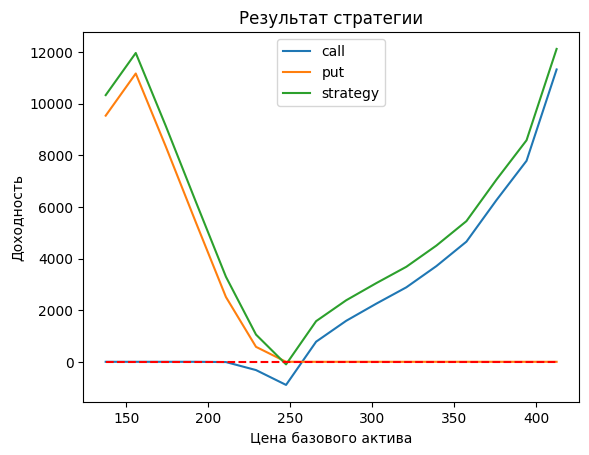

In [152]:
call_res = np.sum(np.maximum(np.expand_dims(S_T, axis=0) - np.expand_dims(K, axis=1), 0) * np.expand_dims(x_c_opt, axis=0), axis=0)
put_res = np.sum(np.maximum(np.expand_dims(K, axis=1) - np.expand_dims(S_T, axis=0), 0) * np.expand_dims(x_p_opt, axis=0), axis=0)

# if position is positive - we buy and spend money
call_premias = np.where(x_c_opt > 0, -x_c_opt * ask_call, -x_c_opt * bid_call).sum()
put_premias = np.where(x_p_opt > 0, -x_p_opt * ask_put, -x_p_opt * bid_put).sum()

plt.plot(S_T, call_res, label='call')
plt.plot(S_T, put_res, label='put')
plt.plot(S_T, call_res + put_res + call_premias + put_premias, label='strategy')
plt.plot(S_T, np.zeros_like(call_res), 'r--')

plt.title('Результат стратегии')
plt.xlabel('Цена базового актива')
plt.ylabel('Доходность')
plt.legend()
plt.show()